In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import numpy as np

In [4]:
plt.rc('font', family='NanumBarunGothic')

#### 최종 데이터프레임 불러오기 (최종전연령대.pkl)

In [5]:
df = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종.pkl')
df

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
0,강원 강릉시,12,1.417,2.333,1.500,1.556,0,1147478.0,1567237.0,1434881.0,...,4.16,4.19,4.19,4.26,3.80,3.94,4.12,4.01,160474.0,7312582.8
1,강원 고성군,2,2.000,3.000,2.000,2.000,0,236627.0,1009571.0,1255043.0,...,4.14,4.19,4.18,4.14,3.81,4.01,4.10,4.08,163526.0,1021987.9
2,강원 동해시,2,2.000,2.000,1.000,1.824,0,91003.0,163857.0,260025.0,...,4.06,4.22,4.08,3.93,3.78,4.13,4.00,3.92,126167.0,1179949.5
3,강원 삼척시,9,1.750,2.000,1.714,2.000,0,143917.0,601522.0,747283.0,...,4.16,4.32,4.23,4.23,3.88,4.15,4.16,4.03,139689.0,1637981.3
4,강원 속초시,1,2.000,1.996,1.860,1.824,0,481591.0,1122668.0,1345131.0,...,4.15,4.18,4.16,4.23,3.86,4.02,4.07,4.04,174524.0,5271753.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,충북 제천시,7,1.714,3.000,1.833,1.750,0,264708.0,753039.0,655702.0,...,4.20,4.24,4.23,4.24,4.01,4.12,4.08,4.04,109573.0,1578259.0
139,충북 증평군,4,2.000,2.000,2.000,1.667,0,56600.0,320735.0,256707.0,...,4.00,4.36,4.29,4.33,3.71,4.27,4.00,4.00,81672.0,110215.8
140,충북 진천군,2,1.500,1.996,1.500,2.000,0,42046.0,75275.0,100083.0,...,3.86,4.07,4.04,4.29,3.93,3.97,4.13,4.03,71794.0,254616.7
141,충북 청주시,5,2.250,2.000,2.600,3.000,0,796993.0,826937.0,812536.0,...,4.14,4.13,4.21,4.16,3.88,4.02,3.95,3.85,81015.0,986686.2


In [6]:
# 안쓰는 변수들 제거
df.drop(['카드_평일_이용건수', '카드_여행사_이용건수'], axis=1, inplace=True)

##### 결측치 처리

In [7]:
df[df['여행객수'].isnull() == True]

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
66,경북 울주군,1,3.0,1.996,3.0,1.824,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop([66], axis=0, inplace=True)

In [9]:
# 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_20대_이용건수      0
카드_30대_이용건수      0
카드_40대_이용건수      0
카드_50대_이용건수      0
카드_60대_이용건수      0
카드_관광쇼핑_이용건수    12
카드_교통_이용건수      18
카드_숙박_이용건수       0
카드_체험_이용건수       0
카드_주말_이용건수       0
자연경관             0
문화유산             0
교통               0
숙박시설             1
식당및음식            0
쇼핑               0
관광지편의시설          0
관광종사자의친절성        0
체험프로그램           0
관광지물가            0
관광지혼잡도           0
재방문의도            0
타인추천의도           0
평균인당비용           0
여행객수             0
dtype: int64

In [10]:
# 이용건수는 0으로
df['카드_관광쇼핑_이용건수'] = df['카드_관광쇼핑_이용건수'].fillna(0)
df['카드_교통_이용건수'] = df['카드_교통_이용건수'].fillna(0)

In [11]:
# 만족도는 평균값으로
df['숙박시설'] = df['숙박시설'].fillna(df['숙박시설'].mean())
df['재방문의도'] = df['재방문의도'].fillna(df['재방문의도'].mean())

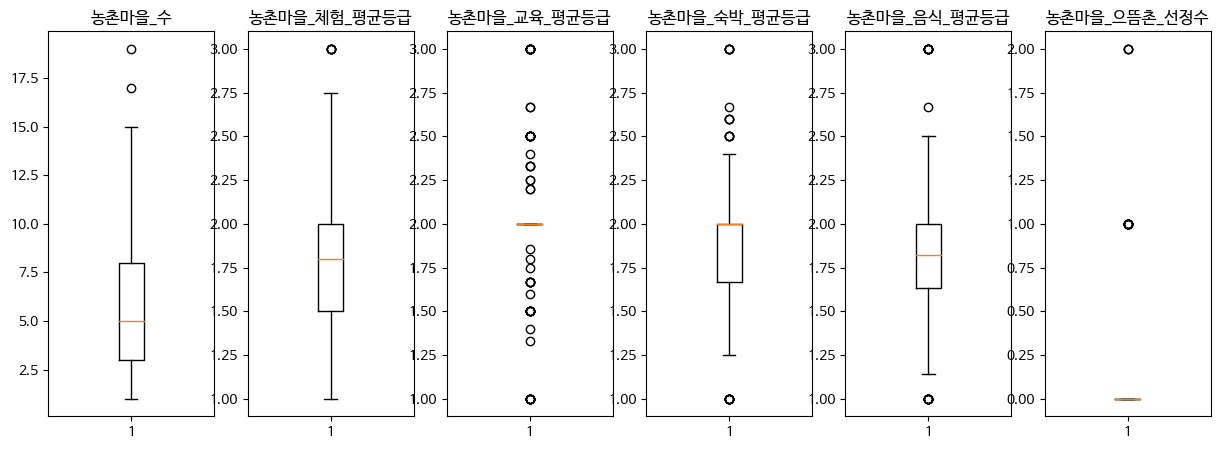

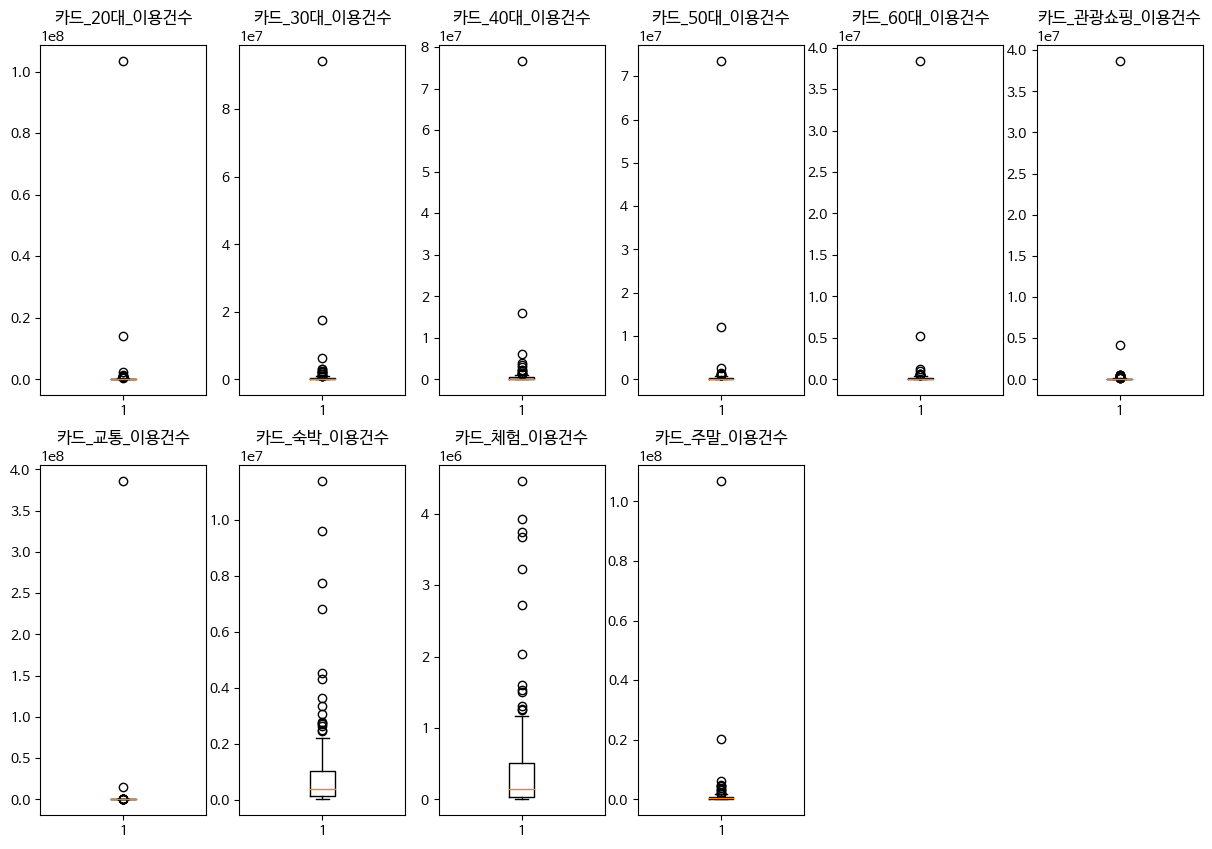

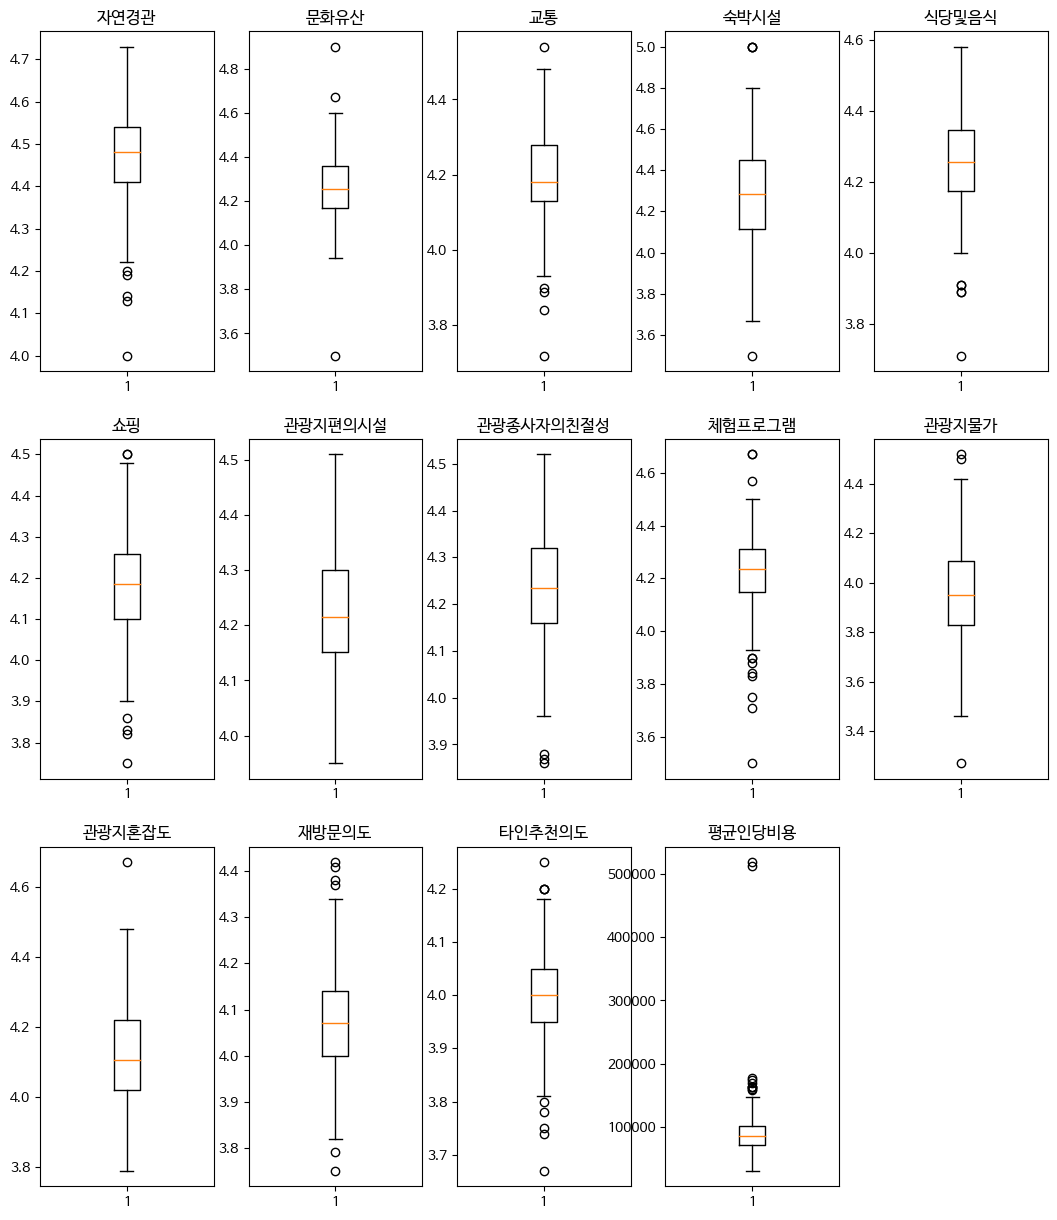

In [12]:
# boxplot
# 변수별 단위 확인
plt.figure(figsize=(15,5))
for i in range(1,7):
  plt.subplot(1,6,i)
  plt.boxplot(df.iloc[:, i])
  plt.title(df.columns[i])
plt.show()

plt.figure(figsize=(15,10))
for i in range(7,17):
  plt.subplot(2,6,i-6)
  plt.boxplot(df.iloc[:, i])
  plt.title(df.columns[i])
plt.show()

plt.figure(figsize=(13,15))
for i in range(17,31):
  plt.subplot(3,5,i-16)
  plt.boxplot(df.iloc[:, i])
  plt.title(df.columns[i])
plt.show()

In [ ]:
# 카드 이용 수와 평균인당 비용 단위가 크기 때문에 로그변환

##### 카드 관련 변수 로그 변환

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 142
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      142 non-null    object 
 1   농촌마을_수        142 non-null    int64  
 2   농촌마을_체험_평균등급  142 non-null    float64
 3   농촌마을_교육_평균등급  142 non-null    float64
 4   농촌마을_숙박_평균등급  142 non-null    float64
 5   농촌마을_음식_평균등급  142 non-null    float64
 6   농촌마을_으뜸촌_선정수  142 non-null    int64  
 7   카드_20대_이용건수   142 non-null    float64
 8   카드_30대_이용건수   142 non-null    float64
 9   카드_40대_이용건수   142 non-null    float64
 10  카드_50대_이용건수   142 non-null    float64
 11  카드_60대_이용건수   142 non-null    float64
 12  카드_관광쇼핑_이용건수  142 non-null    float64
 13  카드_교통_이용건수    142 non-null    float64
 14  카드_숙박_이용건수    142 non-null    float64
 15  카드_체험_이용건수    142 non-null    float64
 16  카드_주말_이용건수    142 non-null    float64
 17  자연경관          142 non-null    float64
 18  문화유산          142 non-null    

In [14]:
# 카드 관련 변수 로그 변환
df_log = df.copy()
df_log.iloc[:, 7:17] = np.log1p(df_log.iloc[:, 7:17])
# 평균인당 비용 로그변환
df_log.iloc[:, -2] = np.log1p(df_log.iloc[:, -2])

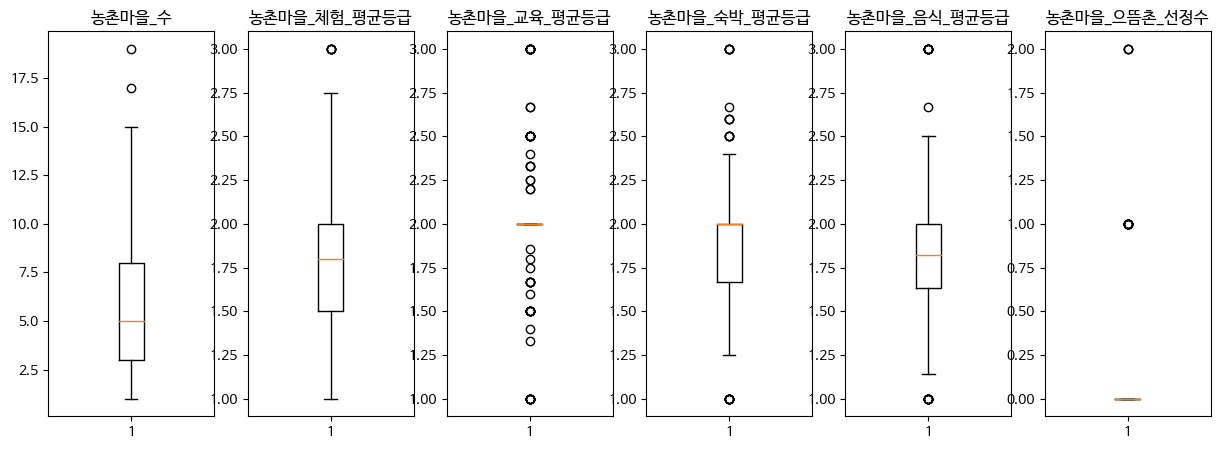

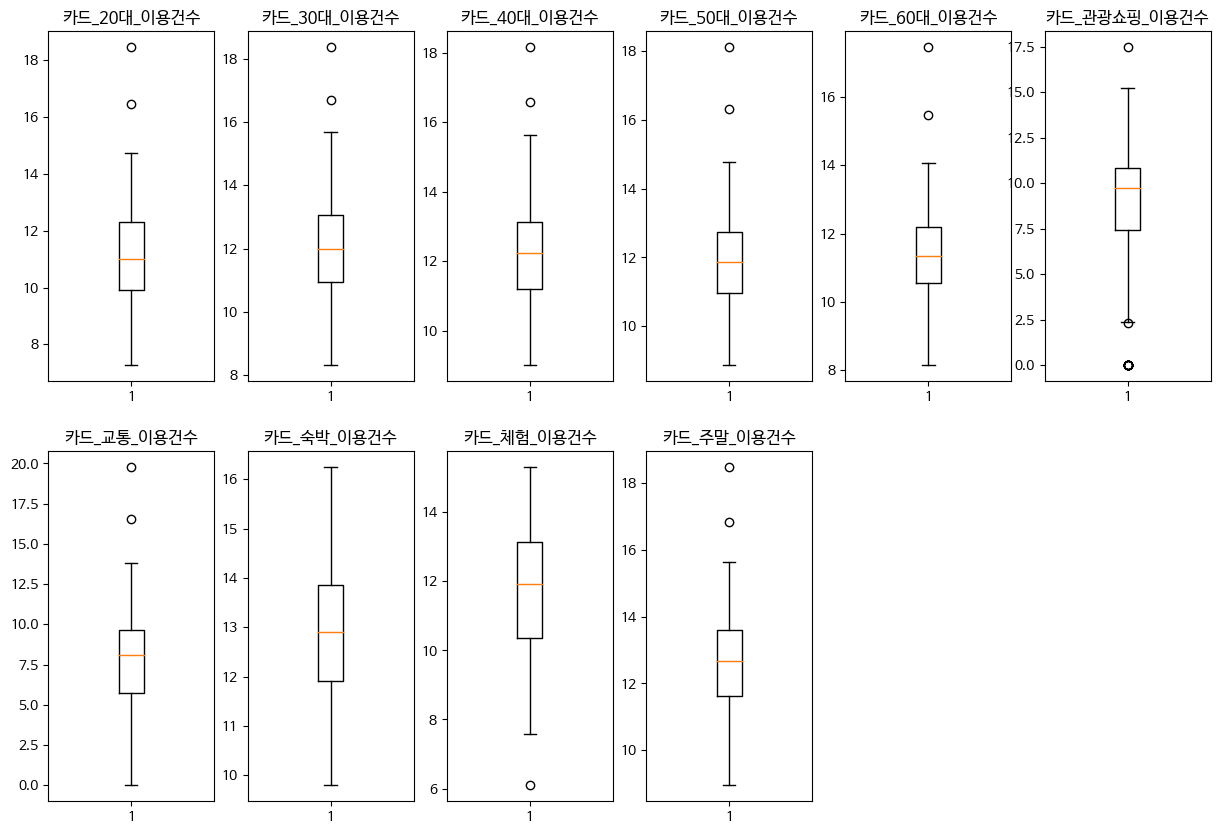

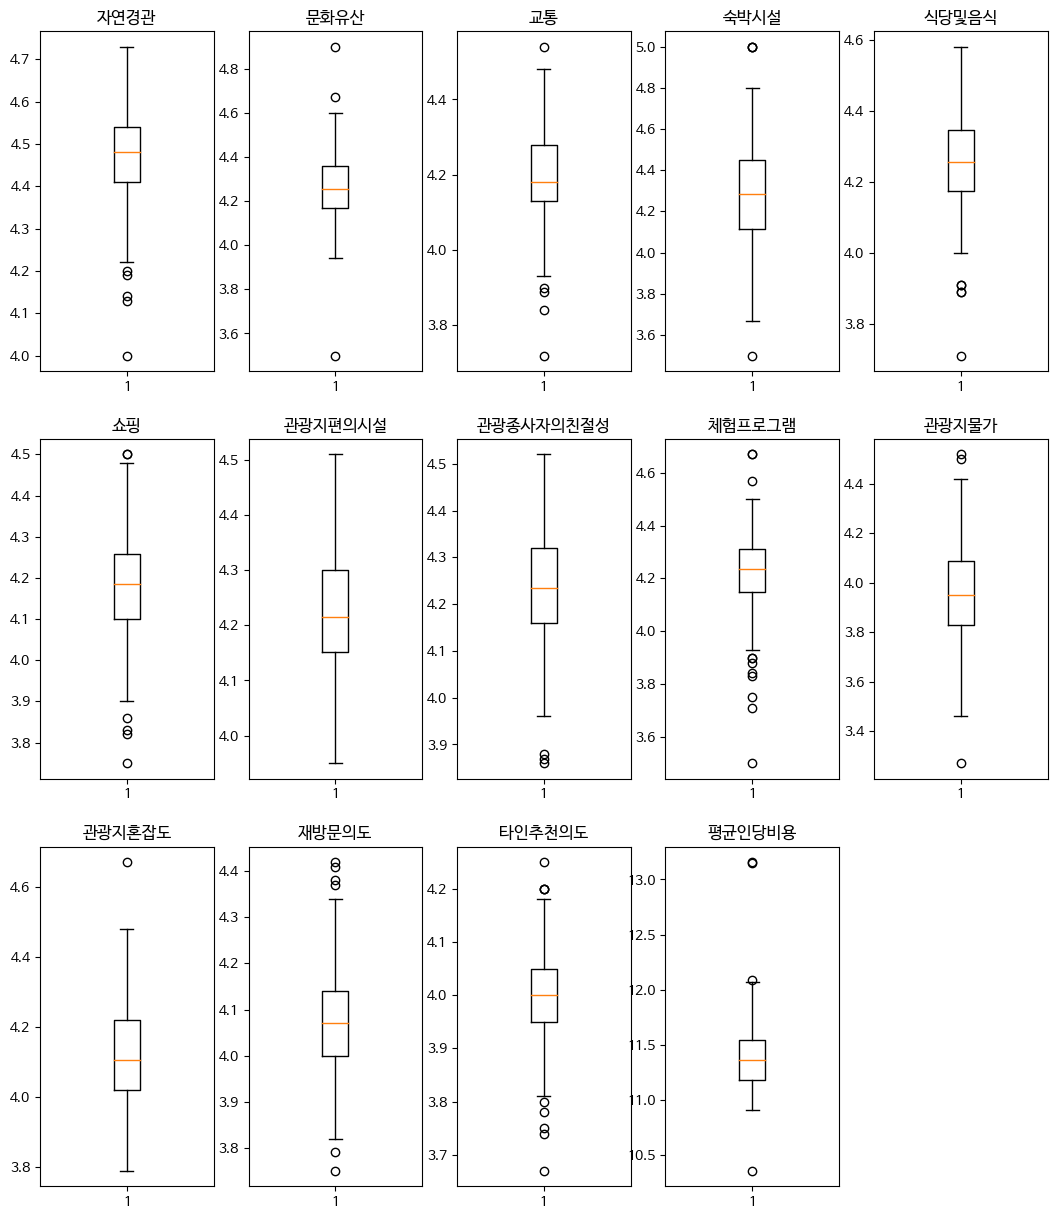

In [15]:
# boxplot
# 변수별 단위 확인
plt.figure(figsize=(15,5))
for i in range(1,7):
  plt.subplot(1,6,i)
  plt.boxplot(df_log.iloc[:, i])
  plt.title(df_log.columns[i])
plt.show()

plt.figure(figsize=(15,10))
for i in range(7,17):
  plt.subplot(2,6,i-6)
  plt.boxplot(df_log.iloc[:, i])
  plt.title(df_log.columns[i])
plt.show()

plt.figure(figsize=(13,15))
for i in range(17,31):
  plt.subplot(3,5,i-16)
  plt.boxplot(df_log.iloc[:, i])
  plt.title(df_log.columns[i])
plt.show()

In [16]:
df_log

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
0,강원 강릉시,12,1.417,2.333,1.500,1.556,0,13.953078,14.264825,14.176593,...,4.16,4.19,4.19,4.26,3.80,3.94,4.12,4.01,11.985893,7312582.8
1,강원 고성군,2,2.000,3.000,2.000,2.000,0,12.374245,13.825037,14.042681,...,4.14,4.19,4.18,4.14,3.81,4.01,4.10,4.08,12.004733,1021987.9
2,강원 동해시,2,2.000,2.000,1.000,1.824,0,11.418659,12.006755,12.468537,...,4.06,4.22,4.08,3.93,3.78,4.13,4.00,3.92,11.745370,1179949.5
3,강원 삼척시,9,1.750,2.000,1.714,2.000,0,11.876999,13.307220,13.524201,...,4.16,4.32,4.23,4.23,3.88,4.15,4.16,4.03,11.847181,1637981.3
4,강원 속초시,1,2.000,1.996,1.860,1.824,0,13.084853,13.931219,14.112003,...,4.15,4.18,4.16,4.23,3.86,4.02,4.07,4.04,12.069823,5271753.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,충북 제천시,7,1.714,3.000,1.833,1.750,0,12.486386,13.531874,13.393463,...,4.20,4.24,4.23,4.24,4.01,4.12,4.08,4.04,11.604355,1578259.0
139,충북 증평군,4,2.000,2.000,2.000,1.667,0,10.943782,12.678374,12.455695,...,4.00,4.36,4.29,4.33,3.71,4.27,4.00,4.00,11.310479,110215.8
140,충북 진천군,2,1.500,1.996,1.500,2.000,0,10.646543,11.228917,11.513765,...,3.86,4.07,4.04,4.29,3.93,3.97,4.13,4.03,11.181570,254616.7
141,충북 청주시,5,2.250,2.000,2.600,3.000,0,13.588602,13.625485,13.607917,...,4.14,4.13,4.21,4.16,3.88,4.02,3.95,3.85,11.302402,986686.2


### 클러스터링

#### T-SNE 2차원으로 축소

In [35]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
# 변수 스케일링
scaler = MinMaxScaler()
df_scaled = df_log.copy()
df_scaled.iloc[:,1:-1] = scaler.fit_transform(df_scaled.iloc[:,1:-1])

In [36]:
tsne_np = TSNE(n_components = 2, random_state=10).fit_transform(df_scaled.iloc[:, 1:-1])

In [37]:
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
tsne_df

,component 0,component 1
0,-3.124885,4.319533
1,-2.335838,6.326306
2,2.361001,5.946421
3,-1.069856,1.016174
4,-2.194796,3.389129
...,...,...
137,-1.686363,5.005454
138,3.233732,1.201053
139,4.660476,4.849125
140,-5.375435,2.990643


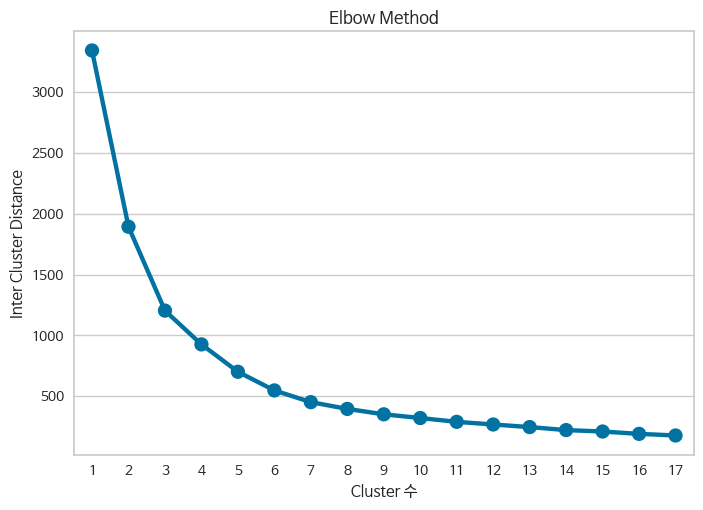

In [38]:
# Elbow method로 적정 클러스터 수 찾기
inertia = {}
for k in range(1,18):
    kmeans = KMeans(n_clusters = k, random_state=10).fit(tsne_df)
    inertia[k] = kmeans.inertia_
plt.title('Elbow Method')
plt.xlabel('Cluster 수')
plt.ylabel('Inter Cluster Distance')
sns.pointplot(x=list(inertia.keys()), y=list(inertia.values()))
plt.show()

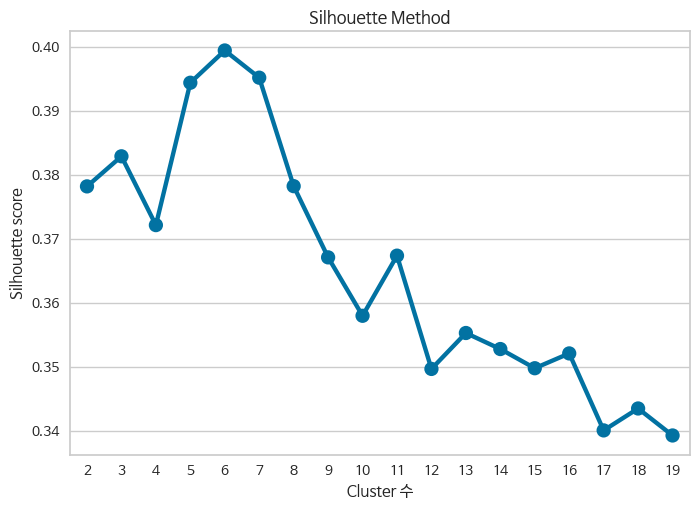

In [39]:
# 실루엣계수로 확인 (1에 가까울수록 군집화가 잘되는 것)
from sklearn.metrics import silhouette_score

score = {}
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state=10).fit(tsne_df)
    labels = kmeans.labels_
    score[k] = silhouette_score(tsne_df, labels, metric='euclidean')

plt.title('Silhouette Method')
plt.xlabel('Cluster 수')
plt.ylabel('Silhouette score')
sns.pointplot(x=list(score.keys()), y=list(score.values()))
plt.show()

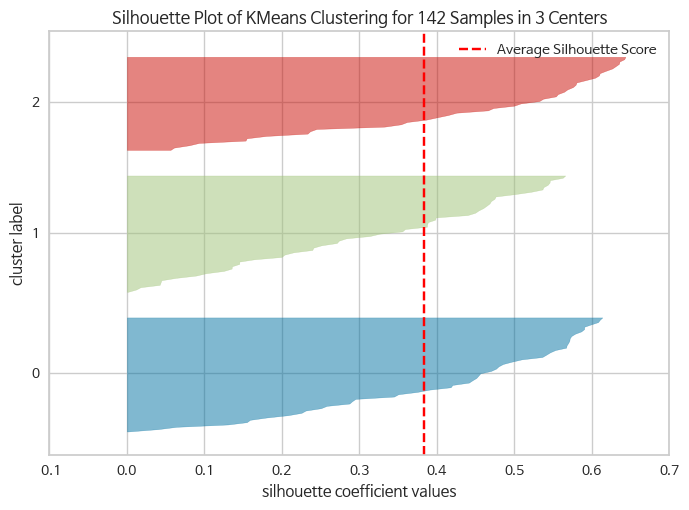

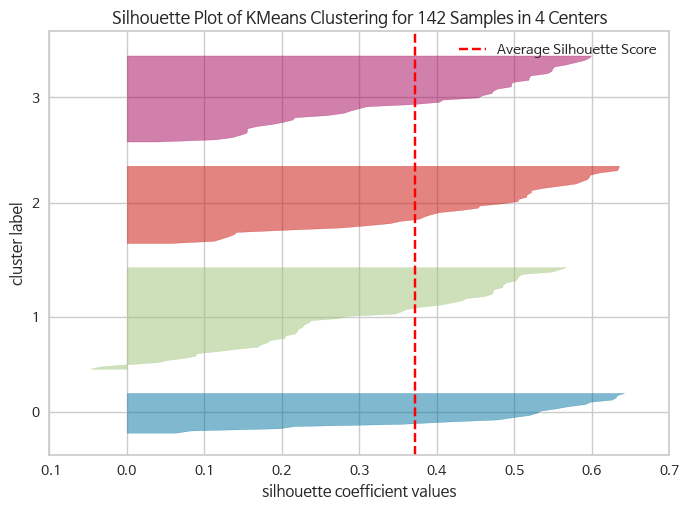

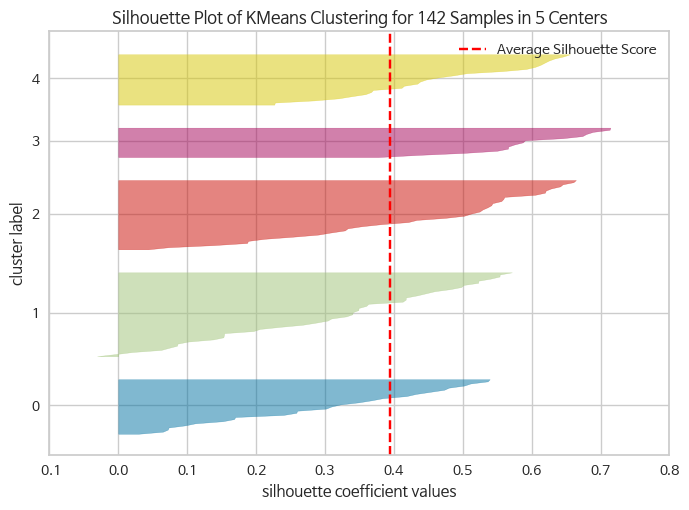

In [40]:
# 군집 개수별 실루엣 계수 확인
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(3,6):
  kmeans = KMeans(n_clusters=i, random_state=10)
  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(tsne_df)
  visualizer.show()

In [41]:
# 군집 3개 선택

In [42]:
# 실루엣 변수 값
kmeans = KMeans(n_clusters=3, random_state=10)
kmeans_fit = kmeans.fit(tsne_df)
labels=kmeans_fit.labels_
centers=kmeans_fit.cluster_centers_
silhouette_score(tsne_df, labels, metric='euclidean')

0.38287476

In [43]:
df_kmeans = df_scaled.copy()
df_kmeans['cluster'] = labels

In [44]:
df_kmeans['cluster'].value_counts()

1    51
0    50
2    41
Name: cluster, dtype: int64

##### 결과 시각화

In [45]:
시군구 = gpd.read_file('/content/drive/MyDrive/문화관광 빅데이터 공모전/전처리/SIG_202302/sig.shp', encoding='cp949')

시군구_코드 = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/전처리/시군구_코드_dict.pkl')

In [46]:
df_cluster_show = df_kmeans.copy()
df_cluster_show['관광지역_시군구_코드'] = df_cluster_show['관광지역_시군구'].apply(lambda x: 시군구_코드[x])
df_cluster_show = gpd.GeoDataFrame(pd.merge(df_cluster_show, 시군구, how='left', left_on='관광지역_시군구_코드', right_on='SIG_CD').drop(['SIG_CD', 'SIG_ENG_NM'],axis=1))

<Figure size 1500x2000 with 0 Axes>

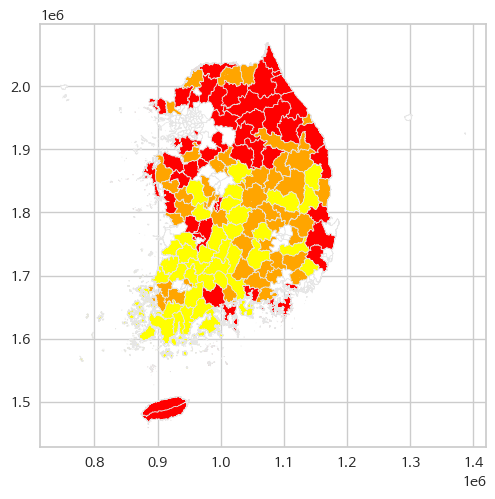

In [47]:
# 군집별 지도에 표시
plt.figure(figsize=(15, 20))
base = 시군구.plot(color='white',linewidth=0.5, edgecolor='0.9')
df_cluster_show[df_cluster_show['cluster'] == 0].plot(color='red',linewidth=0.5, edgecolor='0.9', ax=base)
df_cluster_show[df_cluster_show['cluster'] == 1].plot(color='orange',linewidth=0.5, edgecolor='0.9', ax=base)
df_cluster_show[df_cluster_show['cluster'] == 2].plot(color='yellow',linewidth=0.5, edgecolor='0.9', ax=base)
df_cluster_show[df_cluster_show['cluster'] == 3].plot(color='green',linewidth=0.5, edgecolor='0.9', ax=base)
df_cluster_show[df_cluster_show['cluster'] == 4].plot(color='blue',linewidth=0.5, edgecolor='0.9', ax=base)
plt.show()

In [48]:
plt.rc('font', family='NanumBarunGothic')

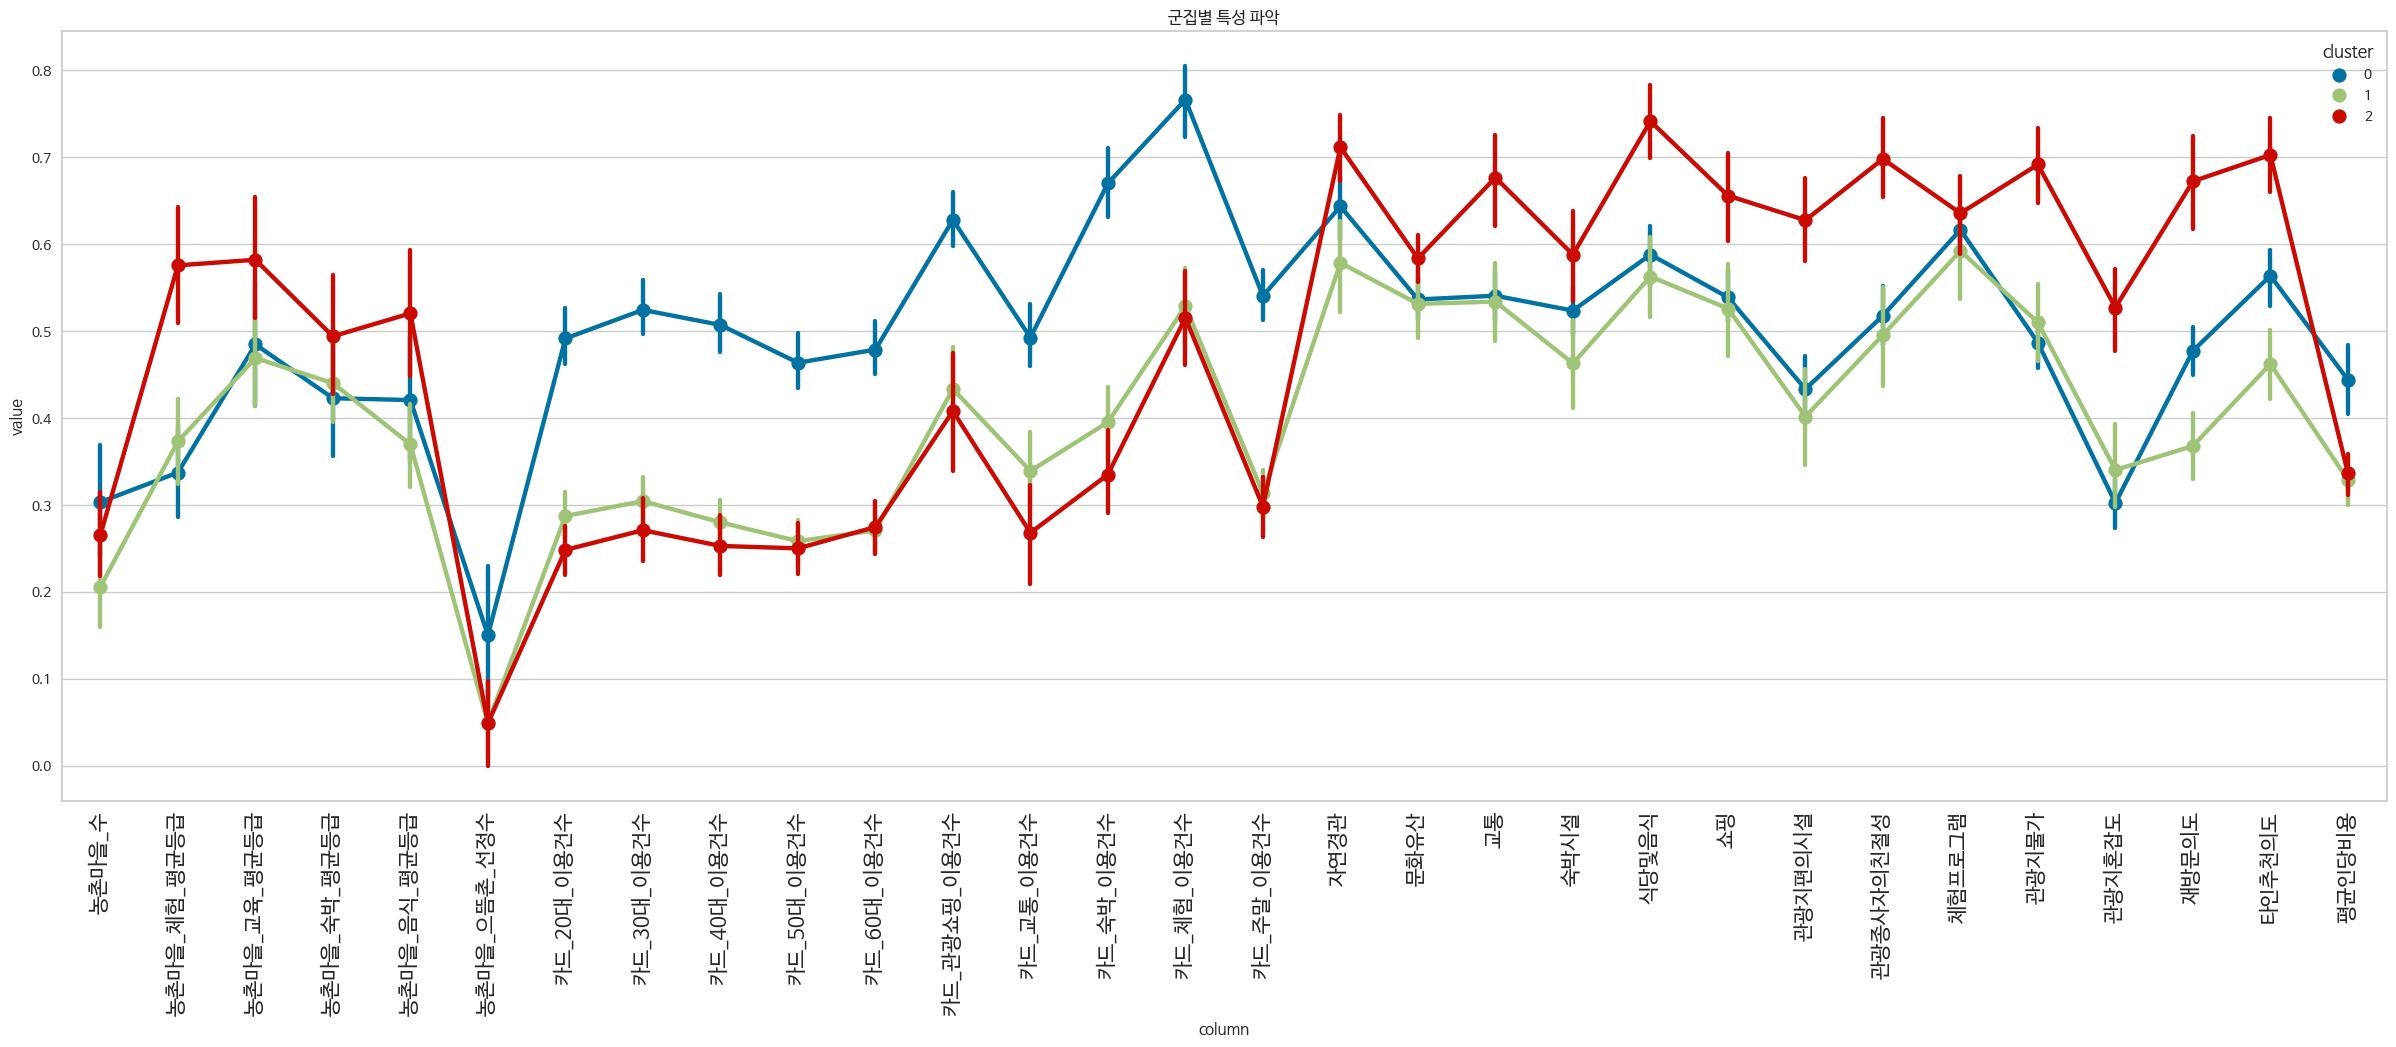

In [49]:
df_snake = df_cluster_show.drop(['관광지역_시군구_코드', 'SIG_KOR_NM', 'geometry'], axis=1)
plt.figure(figsize=(30, 10))
df_melt = pd.melt(df_snake.reset_index(), id_vars=['관광지역_시군구', 'cluster'], value_vars=df_snake.iloc[:,1:-2].columns, var_name='column', value_name='value')
sns.pointplot(data=df_melt, x='column', y='value', hue='cluster')
plt.xticks(rotation=90, fontsize=15)
plt.title("군집별 특성 파악")
plt.show()

In [62]:
df_mean = df_kmeans.groupby(['cluster']).mean()

In [63]:
df_mean

,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,카드_50대_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.303333,0.337320,0.484710,0.422800,0.420700,0.15000,0.491553,0.524415,0.507097,0.463648,...,0.538933,0.433214,0.517879,0.616581,0.486720,0.302273,0.477313,0.563793,0.443942,2.393290e+06
1,0.205882,0.373118,0.469069,0.440098,0.369706,0.04902,0.287319,0.304418,0.279997,0.258380,...,0.526013,0.401611,0.495544,0.592257,0.509961,0.340241,0.367867,0.462137,0.328800,6.065014e+05
2,0.265583,0.575659,0.582098,0.494024,0.520439,0.04878,0.248287,0.270952,0.252862,0.250059,...,0.655935,0.627613,0.698078,0.635606,0.691707,0.527162,0.672370,0.702691,0.336558,8.818144e+05


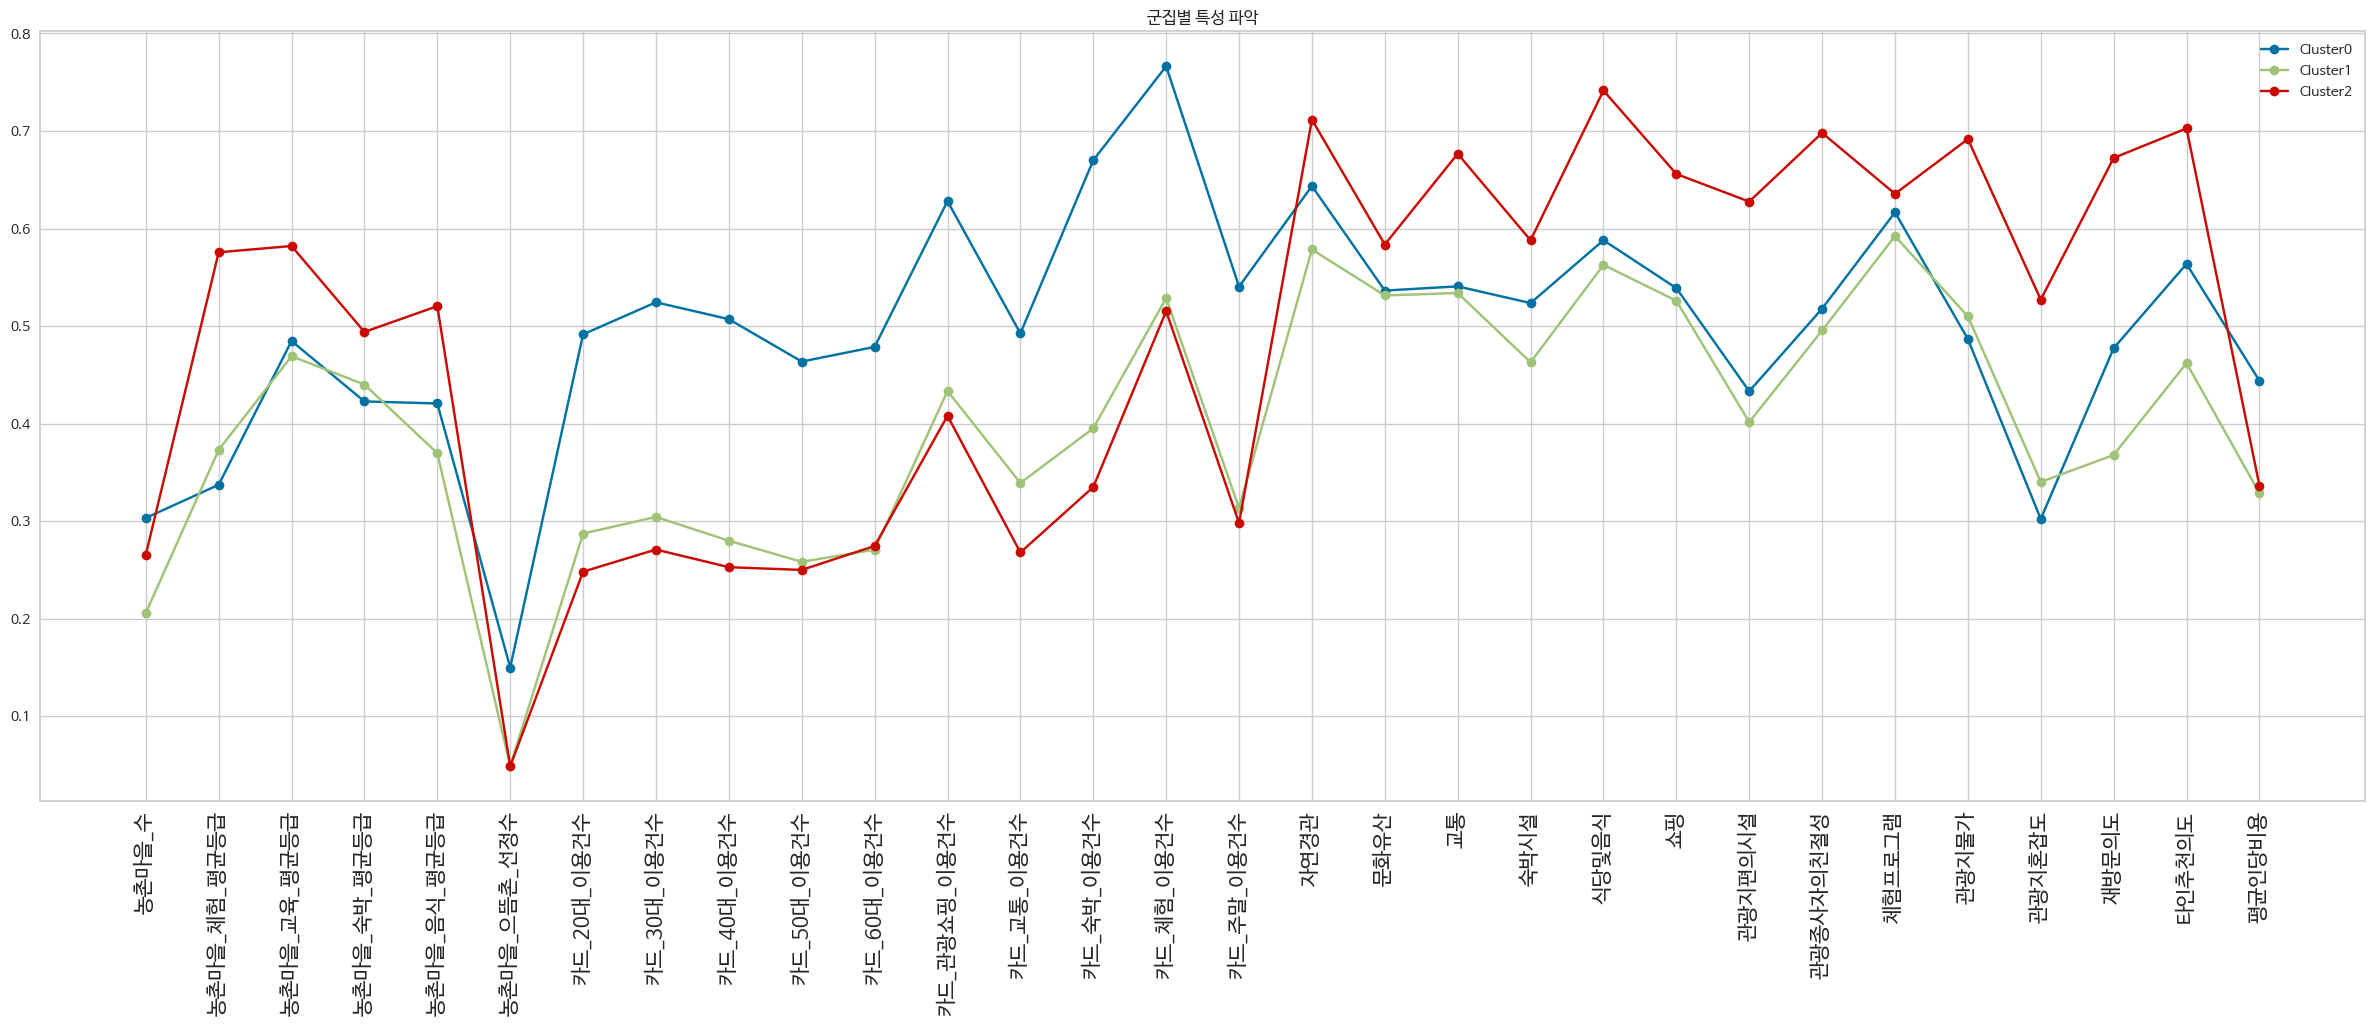

In [64]:
plt.figure(figsize=(30, 10))
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[0,:-1], 'o-', label = 'Cluster0')
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[1,:-1], 'o-', label = 'Cluster1')
plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[2,:-1], 'o-', label = 'Cluster2')
# plt.plot(df_mean.iloc[:, :-1].columns, df_mean.iloc[3,:-1], 'o-', label = 'Cluster3')
plt.xticks(rotation=90, fontsize=15)
plt.title("군집별 특성 파악")
plt.legend()
plt.show()

In [53]:
## 최종 데이터프레임에 클러스터 붙이기

In [54]:
df['cluster'] = labels

In [55]:
df[df['cluster'] == 1]['관광지역_시군구']

2      강원 동해시
5      강원 양구군
7      강원 영월군
13     강원 태백시
16     강원 화천군
19     경기 김포시
23     경기 여주시
24     경기 연천군
25     경기 오산시
29     경기 평택시
33     경남 거창군
34     경남 고성군
35     경남 김해시
37     경남 밀양시
39     경남 산청군
41     경남 의령군
42     경남 진주시
43     경남 창녕군
47     경남 함안군
50     경북 경산시
52     경북 고령군
53     경북 구미시
54     경북 군위군
55     경북 김천시
56     경북 문경시
57     경북 봉화군
58     경북 상주시
60     경북 안동시
61     경북 영덕군
63     경북 영주시
64     경북 영천시
65     경북 예천군
71     경북 칠곡군
73      광주 북구
74     대전 대덕구
76     대전 유성구
78     세종 세종시
84     전남 광양시
86     전남 나주시
88     전남 무안군
99     전남 함평군
117    충남 계룡시
119    충남 금산군
123    충남 부여군
124    충남 서산시
125    충남 서천군
129    충남 청양군
131    충남 홍성군
137    충북 음성군
139    충북 증평군
140    충북 진천군
Name: 관광지역_시군구, dtype: object

In [56]:
df.to_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종클러스터링1.pkl')

In [57]:
df_mean = df.groupby(['cluster']).mean()
df_mean

,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_20대_이용건수,카드_30대_이용건수,카드_40대_이용건수,카드_50대_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
cluster,,,,,,,,,,,,,,,,,,,,,
0,6.460000,1.674640,1.969420,1.845600,1.841400,0.300000,2.764097e+06,3.192030e+06,2.856846e+06,2.233072e+06,...,4.154200,4.192600,4.201800,4.221400,3.878400,4.056000,4.069800,3.997000,122957.720000,2.393290e+06
1,4.705882,1.746235,1.938137,1.880196,1.739412,0.098039,6.615455e+04,1.382672e+05,1.527279e+05,1.093114e+05,...,4.144510,4.174902,4.187059,4.192941,3.907451,4.089412,3.996471,3.938039,82034.686275,6.065014e+05
2,5.780488,2.151317,2.164195,1.988049,2.040878,0.097561,3.916229e+04,1.099070e+05,1.353236e+05,1.018731e+05,...,4.241951,4.301463,4.320732,4.243659,4.134634,4.253902,4.200488,4.077561,83164.804878,8.818144e+05
